In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Write Function

In [4]:
def FindR(X, Y):
    fraction = ((X - X.mean())*(Y - Y.mean())).sum()
    denorminator = np.sqrt(((X - X.mean())**2).sum()*((Y - Y.mean())**2).sum())
    r = fraction/denorminator
    return r

In [5]:
def FindAB(X, Y, X2, XY):
    denorminator = X2.mean() - (X.mean())**2
    a = (XY.mean() - X.mean()*Y.mean())/denorminator
    b = (X2.mean()*Y.mean() - X.mean()*XY.mean())/denorminator
    return a, b

In [6]:
def FindYhat(a, X, b):
    Yhat = a*X + b
    return Yhat

In [7]:
def FindError(Y, Yhat):
    Error = ((Y - Yhat)**2).sum()
    return Error

### Import Data

In [39]:
Data1 = pd.read_csv('BTCUSDT_1d_2022_03_23.csv')
Data1[70:]

,timestamp,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
70,1520812800000,9533.57,9888.88,8780.00,9131.34,42230.777930,1520899199999,3.955627e+08,336642,19369.697756,1.814546e+08,0
71,1520899200000,9131.34,9474.00,8823.00,9150.00,40191.409358,1520985599999,3.673540e+08,342734,19856.457047,1.815344e+08,0
72,1520985600000,9151.92,9333.78,7900.28,8170.00,49708.094108,1521071999999,4.260580e+08,399127,22883.329725,1.963442e+08,0
73,1521072000000,8184.01,8430.00,7650.00,8240.98,52291.022277,1521158399999,4.221307e+08,400529,26414.160251,2.133582e+08,0
74,1521158400000,8240.98,8611.64,7900.00,8260.00,38815.409893,1521244799999,3.223550e+08,255807,20049.433993,1.665635e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1647648000000,41757.51,42400.00,41499.29,42201.13,29067.181080,1647734399999,1.216709e+09,801197,14463.061480,6.054807e+08,0
1539,1647734400000,42201.13,42296.26,40911.00,41262.11,30653.334680,1647820799999,1.273881e+09,799695,14636.726620,6.083282e+08,0
1540,1647820800000,41262.11,41544.22,40467.94,41002.25,39426.248770,1647907199999,1.618790e+09,947206,19079.426520,7.833662e+08,0
1541,1647907200000,41002.26,43361.00,40875.51,42364.13,59454.942940,1647993599999,2.525976e+09,1367343,30215.547850,1.283335e+09,0


In [40]:
DataMatrix1 = Data1.values
DataMatrix1

array([[1.51476480e+12, 1.37156500e+04, 1.38185500e+04, ...,
        3.96193895e+03, 5.28097474e+07, 0.00000000e+00],
       [1.51485120e+12, 1.33821600e+04, 1.54734900e+04, ...,
        1.13463267e+04, 1.58080089e+08, 0.00000000e+00],
       [1.51493760e+12, 1.46900000e+04, 1.53075600e+04, ...,
        8.99495357e+03, 1.33587333e+08, 0.00000000e+00],
       ...,
       [1.64782080e+12, 4.12621100e+04, 4.15442200e+04, ...,
        1.90794265e+04, 7.83366152e+08, 0.00000000e+00],
       [1.64790720e+12, 4.10022600e+04, 4.33610000e+04, ...,
        3.02155478e+04, 1.28333480e+09, 0.00000000e+00],
       [1.64799360e+12, 4.23641300e+04, 4.25299900e+04, ...,
        6.86607649e+03, 2.89369176e+08, 0.00000000e+00]])

In [41]:
X1 = DataMatrix1[-1000:, 1:2]
# X1

In [43]:
Data2 = pd.read_csv('BNBUSDT_1d_2022_03_23.csv')
Data2

,timestamp,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1514764800000,8.5478,8.7000,7.8000,8.4500,654338.840,1514851199999,5.400588e+06,20279,284543.080,2.353359e+06,0
1,1514851200000,8.4500,9.1133,8.0922,8.7150,1262633.420,1514937599999,1.081123e+07,33193,570796.290,4.897457e+06,0
2,1514937600000,8.7151,9.4697,8.2653,9.3040,947392.650,1515023999999,8.256006e+06,27401,458242.420,4.008115e+06,0
3,1515024000000,9.3040,9.6511,8.5595,9.1430,964494.940,1515110399999,8.720171e+06,28847,441178.830,4.008050e+06,0
4,1515110400000,9.1350,16.8172,8.9651,14.8908,2764977.040,1515196799999,3.497820e+07,51841,1602589.460,2.056864e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1647648000000,397.2000,406.4000,394.9000,399.9000,459996.613,1647734399999,1.842269e+08,285223,235946.934,9.449727e+07,0
1539,1647734400000,399.9000,400.8000,386.2000,390.8000,398984.429,1647820799999,1.569279e+08,265148,200256.330,7.879534e+07,0
1540,1647820800000,390.8000,399.5000,384.8000,396.0000,541479.780,1647907199999,2.132204e+08,282212,280819.680,1.106266e+08,0
1541,1647907200000,396.0000,410.0000,394.8000,404.3000,609034.607,1647993599999,2.466861e+08,315030,321120.295,1.300326e+08,0


In [44]:
DataMatrix2 = Data2.values
DataMatrix2

array([[1.51476480e+12, 8.54780000e+00, 8.70000000e+00, ...,
        2.84543080e+05, 2.35335933e+06, 0.00000000e+00],
       [1.51485120e+12, 8.45000000e+00, 9.11330000e+00, ...,
        5.70796290e+05, 4.89745710e+06, 0.00000000e+00],
       [1.51493760e+12, 8.71510000e+00, 9.46970000e+00, ...,
        4.58242420e+05, 4.00811506e+06, 0.00000000e+00],
       ...,
       [1.64782080e+12, 3.90800000e+02, 3.99500000e+02, ...,
        2.80819680e+05, 1.10626615e+08, 0.00000000e+00],
       [1.64790720e+12, 3.96000000e+02, 4.10000000e+02, ...,
        3.21120295e+05, 1.30032629e+08, 0.00000000e+00],
       [1.64799360e+12, 4.04300000e+02, 4.06500000e+02, ...,
        8.39426120e+04, 3.37579382e+07, 0.00000000e+00]])

In [45]:
Y1 = DataMatrix2[-1000:, 1:2]
# Y1

In [46]:
X1.shape

(1000, 1)

In [47]:
XTrain1 = X1[:700, :] # index 0 to 70
YTrain1 = Y1[:700, :]

XTest1 = X1[700:, :] # index 70 to 100
YTest1 = Y1[700:, :]

In [48]:
r1 = FindR(X1, Y1)
r1

0.9073121103140138

### Create Model

In [49]:
a1, b1 = FindAB(XTrain1, YTrain1, XTrain1**2, XTrain1*YTrain1)
YhatTrain1 = FindYhat(a1, XTrain1, b1)
ErrorTrain1 = FindError(YTrain1, YhatTrain1)

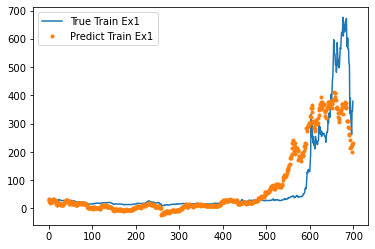

In [55]:
plt.plot(YTrain1, label='True Train Ex1')
plt.plot(YhatTrain1, '.', label='Predict Train Ex1')
plt.legend()

In [51]:
ErrorTrain1

4033491.9452658864

### Make Prediction

In [52]:
YhatTest1 = FindYhat(a1, XTest1, b1)
ErrorTest1 = FindError(YTest1, YhatTest1)

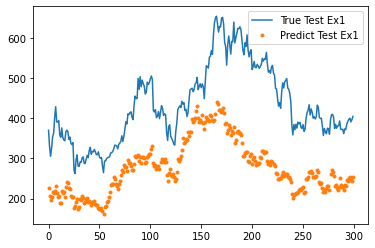

In [53]:
plt.plot(YTest1, label='True Test Ex1')
plt.plot(YhatTest1, '.', label='Predict Test Ex1')
plt.legend()